# SUMMARY
In this document, descriptive statistics are made on a survey carried out on users hollding the NEAR protocol tokens.

In [47]:
import pandas as pd
import numpy as np

In [48]:
df=pd.read_excel('ranking_survey.xlsx')

In [49]:
df.drop('Unnamed: 3', inplace=True, axis=1)

In [50]:
for item in df.columns:
    print(item)

¿Te gustaría contar con la opción de generar rendimiento en tus activos digitales sin la necesidad de solicitar una línea de crédito con tarjeta Crecy?
¿Qué valor de *NEAR en MXN *planeas poner como garantía?
Prioridad #1
Prioridad #2
Prioridad #3
¿A cuántos meses te gustaría financiar la mayoría de las compras que hagas con tu tarjeta Crecy?


In [51]:
df=df.dropna().reset_index(drop=True)

In [52]:
new_name=columns=['Wish yield without CL','NEAR in MXN','P 1','P 2','P 3','Loan lenght']

In [53]:
cols={df.columns[k]: new_name[k] for k in range(6)}

In [54]:
# Rename columns
df.rename(columns=cols, inplace=True)

# Float numbers to do stats
df['NEAR in MXN']=df['NEAR in MXN'].astype(float)

# again, convert string data to numeric
df["Loan lenght"]= df["Loan lenght"].str.extract("(\d*\.?\d+)", expand=True).astype(int)

In [55]:
priorities=list(df['P 1'][0:3])
new_labels=['Taxes', 'Liquidity','Yield' ]

In [56]:
for item in priorities:
    print(item)

Quiero optimizar mis impuestos
Me da oportunidad de acceder a liquidez sin vender mis activos digitales
Me gusta que puedo generar rendimientos en mis criptos


In [57]:
dct={i: j for i, j in zip(priorities, new_labels)}
df.replace(dct, inplace=True)
df

,Wish yield without CL,NEAR in MXN,P 1,P 2,P 3,Loan lenght
0,1,16000.0,Taxes,Liquidity,Liquidity,1
1,1,1500.0,Liquidity,Yield,Taxes,12
2,1,5000.0,Yield,Liquidity,Taxes,6
3,1,150000.0,Taxes,Yield,Liquidity,12
4,0,500.0,Taxes,Yield,Liquidity,12
...,...,...,...,...,...,...
121,1,6000.0,Liquidity,Yield,Taxes,6
122,1,5000.0,Liquidity,Yield,Taxes,3
123,1,50000.0,Liquidity,Taxes,Yield,3
124,1,25000.0,Taxes,Yield,Liquidity,1


In [58]:
df.describe()

,Wish yield without CL,NEAR in MXN,Loan lenght
count,126.000000,126.000000,126.000000
mean,0.880952,13349.841270,6.579365
std,0.325137,25911.031249,3.876809
min,0.000000,0.000000,1.000000
25%,1.000000,1000.000000,3.000000
50%,1.000000,3000.000000,6.000000
75%,1.000000,10000.000000,12.000000
max,1.000000,150000.000000,12.000000


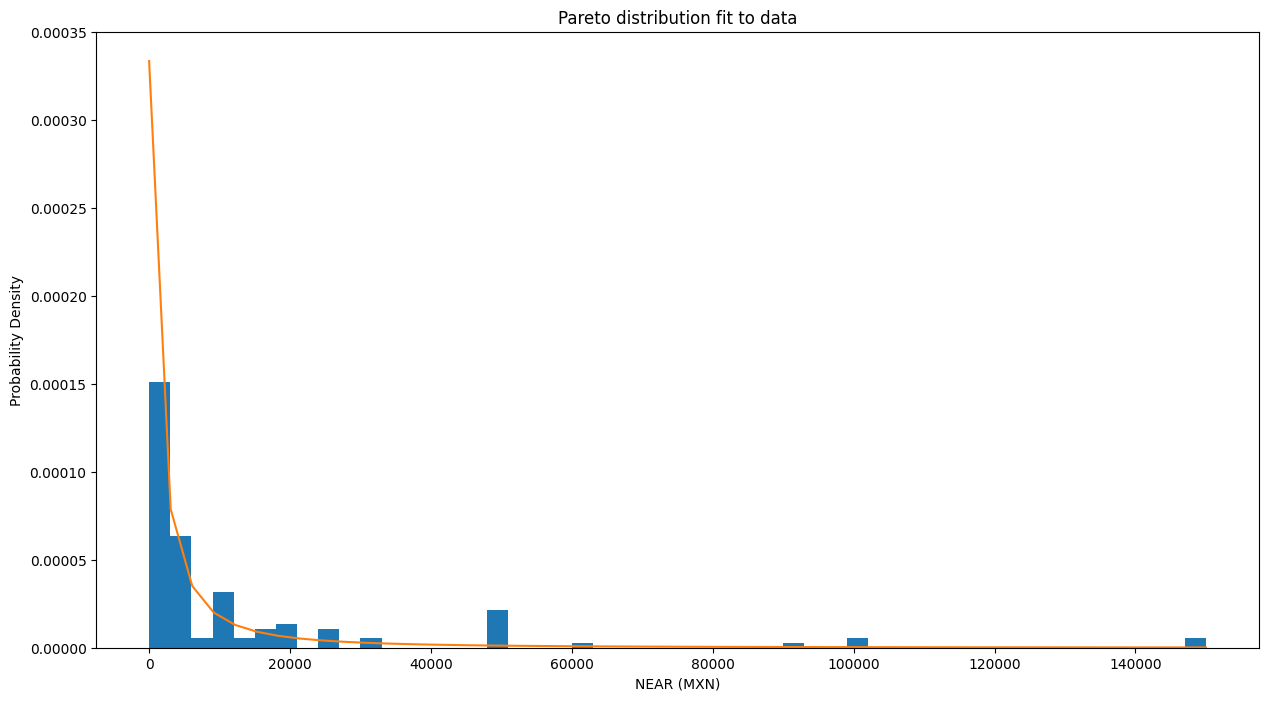

In [60]:
import matplotlib.pyplot as plt
import scipy.stats
import csv
import numpy as np

data = df['NEAR in MXN']
plt.figure(figsize=(15,8))
plt.hist(data, bins=50, density=True)

[a_fit, loc_fit, scale_fit] = scipy.stats.pareto.fit(data)
x = np.linspace(np.min(data), np.max(data))

plt.plot(x, scipy.stats.pareto.pdf(x, a_fit, loc=loc_fit, scale=scale_fit),)

plt.xlabel("NEAR (MXN)")
plt.ylabel("Probability Density")
plt.title('Pareto distribution fit to data')

plt.show()

# PIE CHART

In this section we'll divide the 'votes' of each participant by $7$ ; $\frac{4}{7}$ parts will be assigned to the first priority, $\frac{2}{7}$ to the second and $\frac{1}{7}$ to the third.

It is worth mentioning that the weights grow in a ratio of 2 to 1; this is priority 2 has twice the weight of priority 3 and priority 1 twice the weight of priority 2.

In this way we can know the priorities giving equal weight to each person.

In [110]:
counter={item:0 for item in new_labels}
counter

{'Taxes': 0, 'Liquidity': 0, 'Yield': 0}

In [111]:
for k in range(len(df)):
    ctr_update(df.iloc[k,2],(4/7) )
    ctr_update(df.iloc[k,3],(2/7))
    ctr_update(df.iloc[k,4],(1/7))

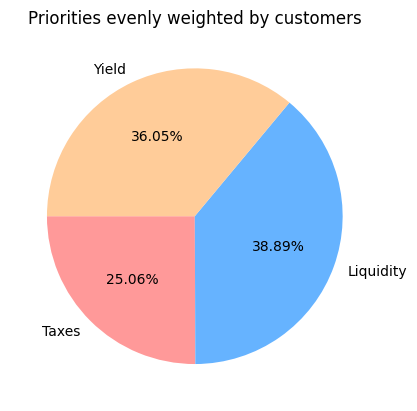

In [106]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Priorities evenly weighted by customers')
plt.show()

# WEIGHTS ACCORDING TO NEAR DEPOSITS

In this section we'll divide the amounts to be deposited (MXN) by each participant by $7$ ; $\frac{4}{7}$ parts will be assigned to the first priority, $\frac{2}{7}$ to the second and $\frac{1}{7}$ to the third.

As an example a $\$7,000$ MXN deposit will accumulate $\$4,000$ MXN in the label chosen as priority 1, $\$2,000$ in priority 2 and $\$1,000$ in priority 3.

In this way category votes are monetarily weighted.

In [66]:
counter={item:0 for item in new_labels}
counter

{'Taxes': 0, 'Liquidity': 0, 'Yield': 0}

In [67]:
def ctr_update(key,val):
    counter[key]+=val
    return None

In [68]:
for k in range(len(df)):
    dep=df.iloc[k,1]
    ctr_update(df.iloc[k,2],dep*(4/7) )
    ctr_update(df.iloc[k,3],dep*(2/7))
    ctr_update(df.iloc[k,4],dep*(1/7))

In [69]:
counter

{'Taxes': 457455.0000000003,
 'Liquidity': 625391.4285714284,
 'Yield': 599233.5714285711}

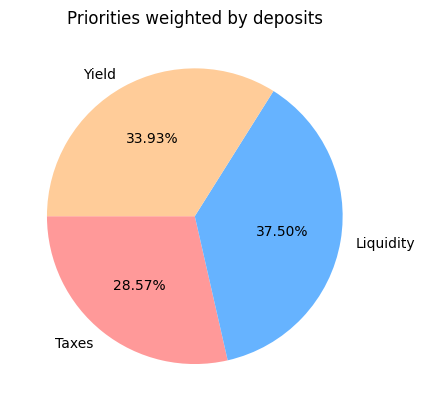

In [86]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Priorities weighted by deposits')
plt.show()

# CUSTOMER CLUSTERING BY LOAN LENGHT

In this section we will cluster according to the duration of the loans.

In [127]:
df.groupby('Loan lenght').describe()

Wish yield without CL                                          \
                            count      mean       std  min  25%  50%  75%   
Loan lenght                                                                 
1                            16.0  0.812500  0.403113  0.0  1.0  1.0  1.0   
3                            25.0  0.920000  0.276887  0.0  1.0  1.0  1.0   
6                            43.0  0.930233  0.257770  0.0  1.0  1.0  1.0   
9                             8.0  0.875000  0.353553  0.0  1.0  1.0  1.0   
12                           34.0  0.823529  0.386953  0.0  1.0  1.0  1.0   

                 NEAR in MXN                                              \
             max       count          mean           std     min     25%   
Loan lenght                                                                
1            1.0        16.0  13906.250000  12318.304469  2000.0  5000.0   
3            1.0        25.0  11451.600000  23056.131583     5.0   500.0   
6            1.0        43.0   9564.883721  17672.039575    50.0  1000.0   
9            1.0         8.0  22635.000000  35141.063892    80.0  3000.0   
12           1.0        34.0  17085.882353  37030.822798     0.0   625.0   

                                         
                 50%      75%       max  
Loan lenght                              
1            10000.0  20000.0   50000.0  
3             2000.0  10000.0  100000.0  
6             3000.0   8000.0   92300.0  
9             7500.0  20000.0  100000.0  
12            1585.0  13750.0  150000.0

In [135]:
df.groupby('Loan lenght').agg(pd.Series.mode).drop(['Wish yield without CL', 'NEAR in MXN', 'P 2', 'P 3'], axis=1)

,P 1
Loan lenght,
1,Liquidity
3,Liquidity
6,"[Liquidity, Yield]"
9,Yield
12,Liquidity


## 1 month

In [71]:
One_month=df[df['Loan lenght']==1]

In [72]:
One_month.describe()

,Wish yield without CL,NEAR in MXN,Loan lenght
count,16.000000,16.000000,16.0
mean,0.812500,13906.250000,1.0
std,0.403113,12318.304469,0.0
min,0.000000,2000.000000,1.0
25%,1.000000,5000.000000,1.0
50%,1.000000,10000.000000,1.0
75%,1.000000,20000.000000,1.0
max,1.000000,50000.000000,1.0


In [81]:
counter={item:0 for item in new_labels}
counter

{'Taxes': 0, 'Liquidity': 0, 'Yield': 0}

In [82]:
for k in range(len(One_month)):
    ctr_update(df.iloc[k,2],(4/7))
    ctr_update(df.iloc[k,3],(2/7))
    ctr_update(df.iloc[k,4],(1/7))

In [83]:
counter

{'Taxes': 4.571428571428572,
 'Liquidity': 5.999999999999998,
 'Yield': 5.428571428571427}

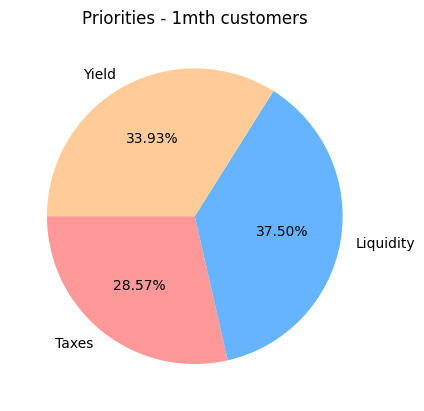

In [87]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Priorities - 1mth customers')
plt.show()

## 3 months

In [90]:
Three_mths=df[df['Loan lenght']==3]

In [91]:
Three_mths.describe()

,Wish yield without CL,NEAR in MXN,Loan lenght
count,25.000000,25.000000,25.0
mean,0.920000,11451.600000,3.0
std,0.276887,23056.131583,0.0
min,0.000000,5.000000,3.0
25%,1.000000,500.000000,3.0
50%,1.000000,2000.000000,3.0
75%,1.000000,10000.000000,3.0
max,1.000000,100000.000000,3.0


In [93]:
counter={item:0 for item in new_labels}
counter

{'Taxes': 0, 'Liquidity': 0, 'Yield': 0}

In [95]:
for k in range(len(Three_mths)):
    ctr_update(df.iloc[k,2],(4/7))
    ctr_update(df.iloc[k,3],(2/7))
    ctr_update(df.iloc[k,4],(1/7))

In [96]:
counter

{'Taxes': 7.285714285714287,
 'Liquidity': 9.285714285714283,
 'Yield': 8.428571428571427}

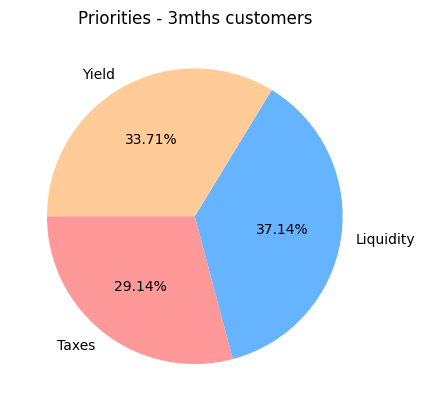

In [97]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Priorities - 3mths customers')
plt.show()

## 6 months

In [113]:
Six_mths=df[df['Loan lenght']==6]

In [114]:
Six_mths.describe()

,Wish yield without CL,NEAR in MXN,Loan lenght
count,43.000000,43.000000,43.0
mean,0.930233,9564.883721,6.0
std,0.257770,17672.039575,0.0
min,0.000000,50.000000,6.0
25%,1.000000,1000.000000,6.0
50%,1.000000,3000.000000,6.0
75%,1.000000,8000.000000,6.0
max,1.000000,92300.000000,6.0


In [115]:
counter={item:0 for item in new_labels}
counter

{'Taxes': 0, 'Liquidity': 0, 'Yield': 0}

In [116]:
for k in range(len(Six_mths)):
    ctr_update(df.iloc[k,2],(4/7))
    ctr_update(df.iloc[k,3],(2/7))
    ctr_update(df.iloc[k,4],(1/7))

In [117]:
counter

{'Taxes': 11.857142857142856,
 'Liquidity': 16.57142857142857,
 'Yield': 14.571428571428571}

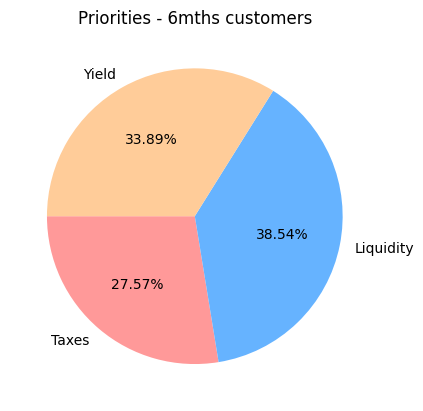

In [119]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Priorities - 6mths customers')
plt.show()

## 12 months

In [120]:
Tlv_mths=df[df['Loan lenght']==12]

In [121]:
Tlv_mths.describe()

,Wish yield without CL,NEAR in MXN,Loan lenght
count,34.000000,34.000000,34.0
mean,0.823529,17085.882353,12.0
std,0.386953,37030.822798,0.0
min,0.000000,0.000000,12.0
25%,1.000000,625.000000,12.0
50%,1.000000,1585.000000,12.0
75%,1.000000,13750.000000,12.0
max,1.000000,150000.000000,12.0


In [122]:
counter={item:0 for item in new_labels}
counter

{'Taxes': 0, 'Liquidity': 0, 'Yield': 0}

In [123]:
for k in range(len(Tlv_mths)):
    ctr_update(df.iloc[k,2],(4/7))
    ctr_update(df.iloc[k,3],(2/7))
    ctr_update(df.iloc[k,4],(1/7))

In [124]:
counter

{'Taxes': 10.000000000000002,
 'Liquidity': 12.285714285714283,
 'Yield': 11.714285714285712}

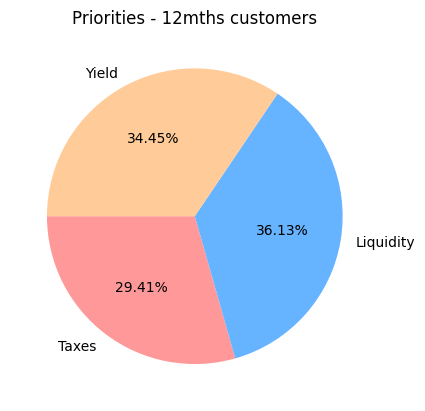

In [125]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Priorities - 12mths customers')
plt.show()

# CORRELATION MATRIX

In this section we'll rescale (logarithm function) the 'Near' amounts since the behavior of the amounts is 'pareto-like'.
Then we'll standarize the 'Near' deposits and then perform a 'One Hot Encoding' to the 'Priorities' variables.

This should improve the overall quality of the data analysis.

In [61]:
df2=df.copy()
df2.drop(['P 2','P 3'],axis=1, inplace=True)

In [62]:
df2['NEAR in MXN']=df2['NEAR in MXN']+0.5
## log(0) derives in NaN values

In [63]:
df2['Log NEAR']=np.log(df2['NEAR in MXN'])
df2.drop('NEAR in MXN', axis=1, inplace=True)

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df2[['Log NEAR']])
df2['Std Log NEAR'] = scaler.transform(df2[['Log NEAR']])
df2.drop('Log NEAR', inplace=True, axis=1)

In [66]:
# Perform one-hot encoding on all columns
one_hot = pd.get_dummies(df2, columns=['P 1'], drop_first=False)
one_hot

,Wish yield without CL,Loan lenght,Std Log NEAR,P 1_Liquidity,P 1_Taxes,P 1_Yield
0,1,1,0.812141,0,1,0
1,1,12,-0.299794,1,0,0
2,1,6,0.265724,0,0,1
3,1,12,1.863566,0,1,0
4,0,12,-0.815611,0,1,0
...,...,...,...,...,...,...
121,1,6,0.351371,1,0,0
122,1,3,0.265724,1,0,0
123,1,3,1.347439,1,0,0
124,1,1,1.021802,0,1,0


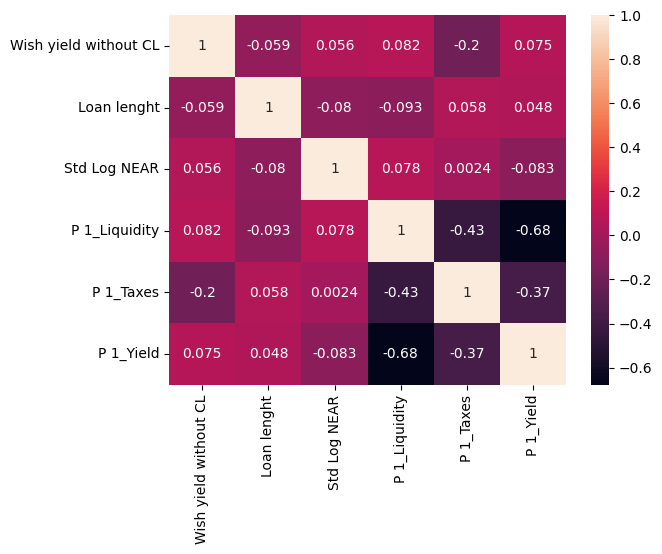

In [67]:
sns.heatmap(one_hot.corr(),annot=True );

# FINAL REMARKS

1. By clustering customers through different criteria, they show that their greatest appetite is for liquidity.
2. The holders are not that much concerned in 'Taxes', there's a negative 0.2 lineal correlation between the desire to accumulate (staking) yield against the desire to optimize taxes.
3. Liquidity and yield are strongly negatively correlated (-0.68).
4. It cannot be said that customers are segmented by purchasing power, the correlations are close to zero. After  rescaling and standardization, correlation is still minuscule.
5. Respondents with NEAR tokens show a heavy-tailed distribution (and positive bias) with respect to deposits.